In [1]:
#importing required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading training data
train = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
#first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#number of nulls in each column
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#checking data type 
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Visualization

<AxesSubplot:xlabel='Survived', ylabel='Count'>

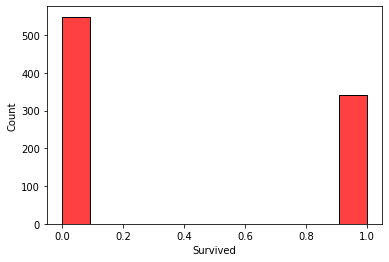

In [6]:
sns.histplot(data = train, x="Survived",color='r')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

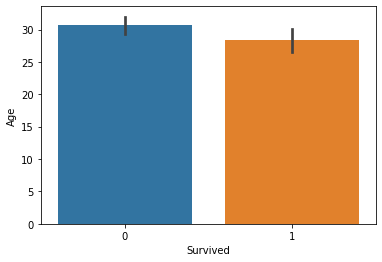

In [7]:
#Target variables quantitatives
sns.barplot(data = train, x="Survived", y="Age")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

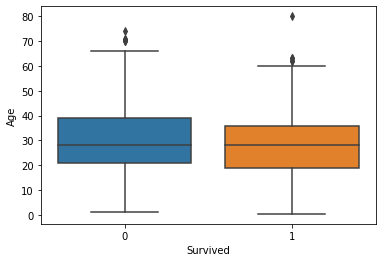

In [8]:
sns.boxplot(data = train, y="Age", x="Survived")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

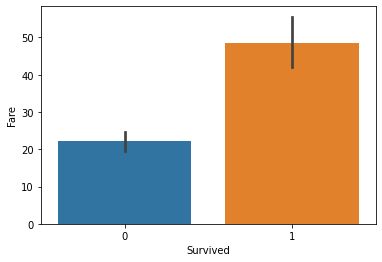

In [9]:
sns.barplot(data = train, x="Survived", y="Fare")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

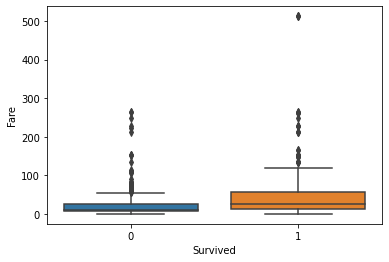

In [10]:
sns.boxplot(data = train, y="Fare", x="Survived")

In [11]:
#select columns to be used in training
colunas = ['Pclass','SibSp','Parch','Fare']
X = train[colunas]
y = train.Survived

In [12]:
#there is a need for pre-processing in the other fields
#split dataset into trainig and testing data from training data
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 0)

In [13]:
model = DecisionTreeClassifier(random_state=1)
model.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

In [14]:
#testing on test data
prediction = model.predict(val_X)

In [15]:
prediction

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1])

In [16]:
metrics.accuracy_score(val_y, prediction)

0.7130044843049327

In [17]:
print(classification_report(val_y,prediction))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       139
           1       0.63      0.58      0.60        84

    accuracy                           0.71       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.71      0.71      0.71       223



**Predict the test suite and send it to the scoreboard**

In [18]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
test = test_data[colunas]
test

,Pclass,SibSp,Parch,Fare
0,3,0,0,7.8292
1,3,1,0,7.0000
2,2,0,0,9.6875
3,3,0,0,8.6625
4,3,1,1,12.2875
...,...,...,...,...
413,3,0,0,8.0500
414,1,0,0,108.9000
415,3,0,0,7.2500
416,3,0,0,8.0500


In [20]:
test.isna().sum()

Pclass    0
SibSp     0
Parch     0
Fare      1
dtype: int64

In [21]:
#fill the null values with the median
mid = test.Fare.median()
test.fillna(mid,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [22]:
test.isna().sum()

Pclass    0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [23]:
idade=train.loc[train.Age>=60]["Survived"]
rate_idade=sum(idade)/len(idade)
print("survivors over 60 years:", rate_idade)

survivors over 60 years: 0.2692307692307692


In [24]:
predictions = model.predict(test)

In [25]:
#saving output in submission.csv
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': predictions})
output.to_csv('submission.csv', index=False)

In [26]:
age=train.loc[train.Age>=60]["Survived"]
rate_age=sum(age)/len(age)
print("survivors over 60 years:", rate_age)

survivors over 60 years: 0.2692307692307692


In [27]:
y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1)

In [28]:
model.fit(X, y)
prediction = model.predict(X_test)

In [29]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index=False)